# WeatherPy
----

#### Overview
* This notebook analyzes weather data to better understand what the weather is like as we approach the equator.
* It visualizes the weather of 500+ randomly selected cities across the world using the the OpenWeatherMap API, and creates a representative model of weather across world cities through analyzing relationships between humidity, cloudiness, temperature and latitude/longitude.
#### Key Findings
* This notebook analyzes weather data to better understand what the weather is like as we approach the equator.
* It visualizes the weather of 500+ randomly selected cities across the world using the the OpenWeatherMap API, and creates a representative model of weather across world cities through analyzing relationships between humidity, cloudiness, temperature and latitude/longitude.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import json
from pprint import pprint
from datetime import datetime
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [44]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [45]:
# Configure url for API calls
base_url= "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Retrieve the json response for one of my cities as a test and to figure out how to navigate the data structure
# christchurch_weather = requests.get(f'{url}christchurch').json()
# pprint(christchurch_weather)

In [46]:
# Define lists to store retrieved fields into
final_city_list = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

num_cities = 0

In [23]:
# Let's test with a smaller list not to incur so many API calls
#mini_city_list = []
#for i in range (50):
#    mini_city_list.append(cities[i])
    
# print(mini_city_list)

In [47]:
# For each city, call the openweathermap.api org's current weather API
print("Beginning Data Retrieval")
for city in cities:
    response = requests.get(url + city).json()
    #print(url + city)
    #print(response)
    
    try:
       
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        final_city_list.append(city)
        num_cities += 1
        print(f"Processing Record {num_cities} | {city}")
    
    # If there is no weather data available for this city, then skip it
    except:
        print("City not found. Skipping.....")
        pass
print("Data Retrieval Complete")
              
 
        

Beginning Data Retrieval
Processing Record 1 | carnarvon
Processing Record 2 | tessalit
City not found. Skipping.....
Processing Record 3 | phonhong
Processing Record 4 | hobart
City not found. Skipping.....
Processing Record 5 | ust-tsilma
Processing Record 6 | mataura
City not found. Skipping.....
Processing Record 7 | vaini
Processing Record 8 | san jeronimo
Processing Record 9 | albany
Processing Record 10 | butaritari
City not found. Skipping.....
Processing Record 11 | kuytun
Processing Record 12 | nybro
Processing Record 13 | atuona
Processing Record 14 | cape town
Processing Record 15 | new norfolk
Processing Record 16 | belmonte
Processing Record 17 | provideniya
Processing Record 18 | bredasdorp
Processing Record 19 | saldanha
Processing Record 20 | kaitangata
Processing Record 21 | port alfred
Processing Record 22 | barrow
Processing Record 23 | wattegama
Processing Record 24 | esperance
Processing Record 25 | tuktoyaktuk
City not found. Skipping.....
Processing Record 26 | 

Processing Record 227 | dergachi
Processing Record 228 | yuli
Processing Record 229 | booue
Processing Record 230 | caravelas
Processing Record 231 | itarema
Processing Record 232 | almaty
Processing Record 233 | lulea
Processing Record 234 | ghanzi
Processing Record 235 | vostok
Processing Record 236 | umba
Processing Record 237 | rusape
Processing Record 238 | eastbourne
Processing Record 239 | parabel
Processing Record 240 | dingle
Processing Record 241 | north bend
Processing Record 242 | tarko-sale
Processing Record 243 | ambilobe
Processing Record 244 | fort nelson
Processing Record 245 | pangody
Processing Record 246 | shar
Processing Record 247 | mackay
City not found. Skipping.....
Processing Record 248 | inuvik
Processing Record 249 | cherskiy
Processing Record 250 | burnie
Processing Record 251 | lubigan
City not found. Skipping.....
Processing Record 252 | high level
Processing Record 253 | hervey bay
Processing Record 254 | chiredzi
Processing Record 255 | beloha
Processin

Processing Record 459 | gaogou
Processing Record 460 | jose de freitas
Processing Record 461 | redmond
Processing Record 462 | sitka
Processing Record 463 | murdochville
Processing Record 464 | riyadh
Processing Record 465 | langsa
City not found. Skipping.....
Processing Record 466 | havoysund
Processing Record 467 | cabo san lucas
Processing Record 468 | derzhavinsk
Processing Record 469 | katsuura
Processing Record 470 | rassvet
Processing Record 471 | zeya
Processing Record 472 | mahajanga
Processing Record 473 | outlook
Processing Record 474 | kesova gora
Processing Record 475 | sukagawa
Processing Record 476 | paamiut
Processing Record 477 | sabha
Processing Record 478 | alice springs
Processing Record 479 | senneterre
Processing Record 480 | neiafu
Processing Record 481 | olinda
City not found. Skipping.....
Processing Record 482 | rocha
Processing Record 483 | constitucion
Processing Record 484 | matara
Processing Record 485 | vao
Processing Record 486 | senj
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
# Create a dataframe containing the city weather data returned by the API
interim_city_df = pd.DataFrame({
    'City': final_city_list,
    'Latitude': lat,
    'Longitude': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
})
    
interim_city_df.head(50)  



,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,carnarvon,-24.8667,113.6333,77.00,73,1,5.75,AU,1611959521
1,tessalit,20.1986,1.0114,63.84,25,0,13.29,ML,1611959521
2,phonhong,18.5007,102.4166,61.29,76,27,2.21,LA,1611959521
3,hobart,-42.8794,147.3294,69.01,77,20,5.75,AU,1611959402
4,ust-tsilma,65.4410,52.1498,-2.67,90,100,9.42,RU,1611959522
5,mataura,-46.1927,168.8643,58.39,56,25,1.97,NZ,1611959364
6,vaini,-21.2000,-175.2000,75.20,94,90,11.50,TO,1611959523
7,san jeronimo,-11.9472,-75.2829,56.95,64,99,1.45,PE,1611959523
8,albany,42.6001,-73.9662,15.01,44,46,11.99,US,1611959523
9,butaritari,3.0707,172.7902,80.78,74,95,16.71,KI,1611959523


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [49]:
# Remove any cities where the humidity is greater than 100%
city_df = interim_city_df[interim_city_df.Humidity <= 100]

# Remove the extra index column before writing out the data to csv
city_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

# Write the data to a csv file
city_df.to_csv(output_data_file)

In [52]:
# Read the data back into the df while I develop and test the rest of the code.....
# rather than wasting hundreds or thousands of API calls
#city_df = pd.read_csv(output_data_file)
#city_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

# Convert the date format for use in later plots
raw_date = datetime.fromtimestamp(city_df["Date"].iloc[0])
date = raw_date.strftime("%m-%d-%y")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

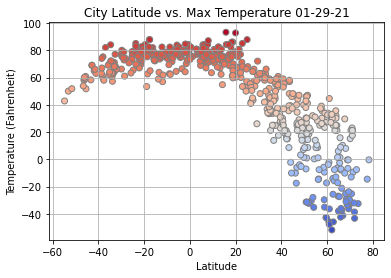

In [53]:
# Generate a scatter plot using latitude and temperature
x_axis = city_df['Latitude']
y_axis = city_df['Max Temp']
plt.scatter(x_axis,y_axis, c=y_axis, cmap='coolwarm',edgecolor='gray')

# add labels and title
plt.xlabel('Latitude')
plt.ylabel('Temperature (Fahrenheit)')
plt.title(f'City Latitude vs. Max Temperature {(date)}')
plt.grid()
plt.savefig('output_data/Lat_vs_Temp_Scatter.png')
plt.show()


**Notes on Latitude vs. Temperature Plot**
- The temperature scale on this plot goes from blue (coldest temperatures) to red (hottest).
- Based on the shape of this plot, we can conclude that the closer we are to the equator (latitude=0) the hotter the temperature!

## Latitude vs. Humidity Plot

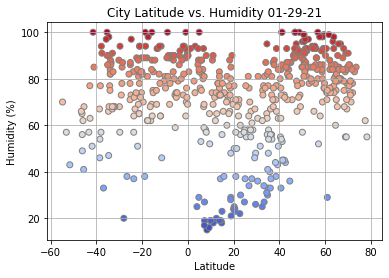

In [54]:
# Generate a scatter plot using latitude and humidity
x_axis = city_df['Latitude']
y_axis = city_df['Humidity']
plt.scatter(x_axis,y_axis, c=y_axis, cmap='coolwarm',edgecolor='gray')

# add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity {(date)}')
plt.grid()
plt.savefig('output_data/Lat_vs_Humidity.png')
plt.show()



**Notes on Latitude vs. Humidity Plot**
- The humidity scale on this plot goes from blue (lowest humidity) to red (highest).
- Although the correlation doesn't appear to be as strong as in the latitude vs temperature plot, it does appear that the regions between 0-40 degrees latitude do tend to have lower humidity levels. 

## Latitude vs. Cloudiness Plot

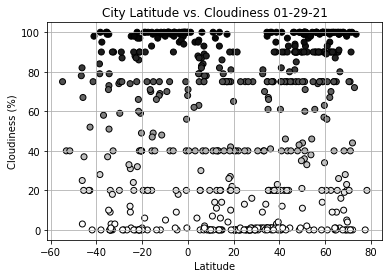

In [55]:
# Generate a scatter plot using latitude and cloudiness
x_axis = city_df['Latitude']
y_axis = city_df['Cloudiness']
plt.scatter(x_axis,y_axis, c=y_axis, cmap='Greys',edgecolor='black')

# add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness {(date)}')
plt.grid()
plt.savefig('output_data/Lat_vs_Cloudiness.png')
plt.show()

**Notes on Latitude vs. Cloudiness Plot**
- The cloudiness scale on this plot goes from light grey (least clouds) to dark grey (most).
- Although the pattern looks weak, at best, it does appear that the regions between 0-40 degrees latitude tend to have less cloudy skies than other regions. 

## Latitude vs. Wind Speed Plot

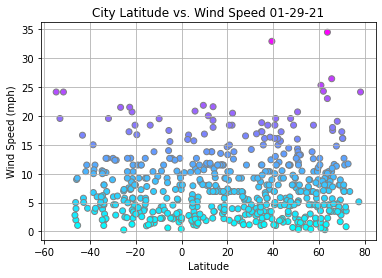

In [56]:
# Generate a scatter plot using latitude and wind speed
x_axis = city_df['Latitude']
y_axis = city_df['Wind Speed']
plt.scatter(x_axis,y_axis, c=y_axis, cmap='cool',edgecolor='gray')

# add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed {(date)}')
plt.grid()
plt.savefig('output_data/Lat_vs_WindSpeed.png')
plt.show()

**Notes on Latitude vs. Wind Speed Plot**
- The wind speed scale on this plot goes from light blue (least windy) to purple (windiest).
- Although there doesn't appear to be a strong trend, it does appear that the regions further away from the equator tend to have the strongest winds (below -40 and above +40 degrees latitude). 

## Linear Regression

In [62]:
# Split up the data into a df for each hemisphere in order to create the next series of linear regression models
northern_df = city_df.loc[city_df['Latitude'] >= 0]
southern_df = city_df.loc[city_df['Latitude'] < 0]
southern_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,carnarvon,-24.8667,113.6333,77.00,73,1,5.75,AU,1611959521
3,hobart,-42.8794,147.3294,69.01,77,20,5.75,AU,1611959402
5,mataura,-46.1927,168.8643,58.39,56,25,1.97,NZ,1611959364
6,vaini,-21.2000,-175.2000,75.20,94,90,11.50,TO,1611959523
7,san jeronimo,-11.9472,-75.2829,56.95,64,99,1.45,PE,1611959523


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:-0.86.


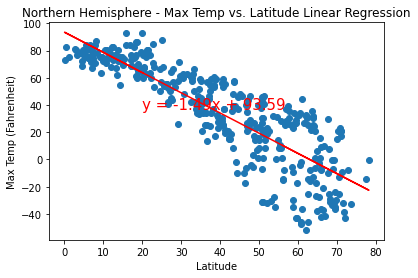

In [67]:
# Calculate the correlation coefficient and linear regression model 
# for Max Temp and Latitude for the Northern Hemisphere

correlation = st.pearsonr(northern_df['Latitude'],northern_df['Max Temp'])
print(f'The r-value is:{round(correlation[0],2)}.')

# Calculate the linear regression model for these two variables
x_values = northern_df['Latitude']
y_values = northern_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data on the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Annotate the regression line
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Fahrenheit)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig('output_data/NLat_vs_MaxTemp_Reg.png')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:0.57.


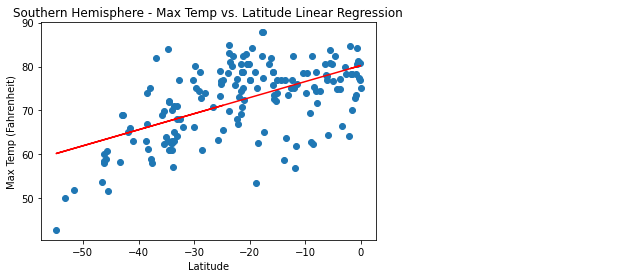

In [68]:
# Calculate the correlation coefficient and linear regression model 
# for Max Temp and Latitude for the Southern Hemisphere

correlation = st.pearsonr(southern_df['Latitude'],southern_df['Max Temp'])
print(f'The r-value is:{round(correlation[0],2)}.')

# Calculate the linear regression model for these two variables
x_values = southern_df['Latitude']
y_values = southern_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data on the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Annotate the regression line
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Fahrenheit)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig('output_data/SLat_vs_MaxTemp_Reg.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:0.39.


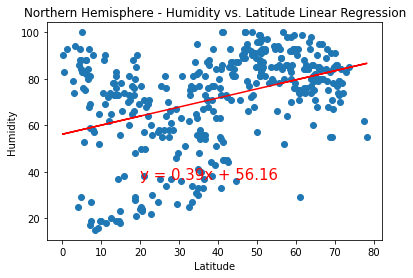

In [70]:
# Calculate the correlation coefficient and linear regression model 
# for Humidity and Latitude for the Northern Hemisphere

correlation = st.pearsonr(northern_df['Latitude'],northern_df['Humidity'])
print(f'The r-value is:{round(correlation[0],2)}.')

# Calculate the linear regression model for these two variables
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data on the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Annotate the regression line
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.savefig('output_data/NLat_vs_Humidity_Reg.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is:0.31.


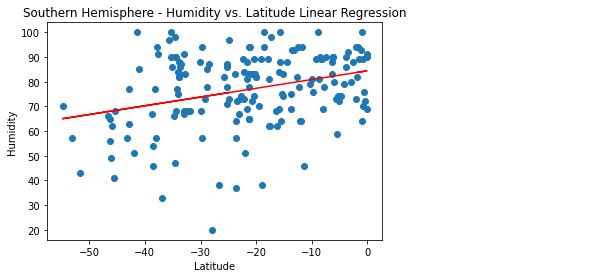

In [71]:
# Calculate the correlation coefficient and linear regression model 
# for Humidity and Latitude for the Southern Hemisphere

correlation = st.pearsonr(southern_df['Latitude'],southern_df['Humidity'])
print(f'The r-value is:{round(correlation[0],2)}.')

# Calculate the linear regression model for these two variables
x_values = southern_df['Latitude']
y_values = southern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data on the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Annotate the regression line
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.savefig('output_data/SLat_vs_Humidity_Reg.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:0.2.


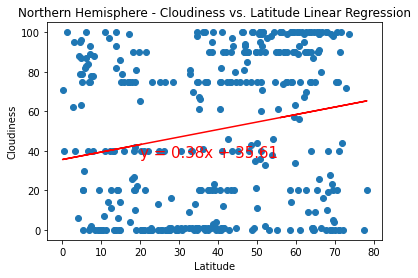

In [72]:
# Calculate the correlation coefficient and linear regression model 
# for Cloudiness and Latitude for the Northern Hemisphere

correlation = st.pearsonr(northern_df['Latitude'],northern_df['Cloudiness'])
print(f'The r-value is:{round(correlation[0],2)}.')

# Calculate the linear regression model for these two variables
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data on the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Annotate the regression line
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.savefig('output_data/NLat_vs_Cloudiness_Reg.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is:0.26.


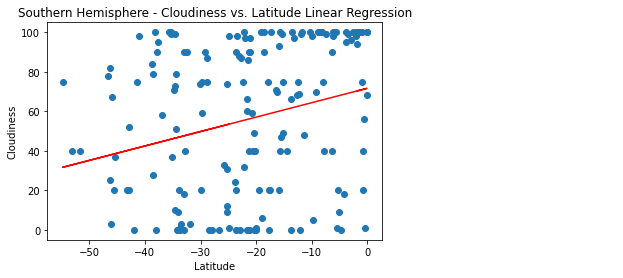

In [73]:
# Calculate the correlation coefficient and linear regression model 
# for Cloudiness and Latitude for the Southern Hemisphere

correlation = st.pearsonr(southern_df['Latitude'],southern_df['Cloudiness'])
print(f'The r-value is:{round(correlation[0],2)}.')

# Calculate the linear regression model for these two variables
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data on the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Annotate the regression line
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.savefig('output_data/SLat_vs_Cloudiness_Reg.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:0.01.


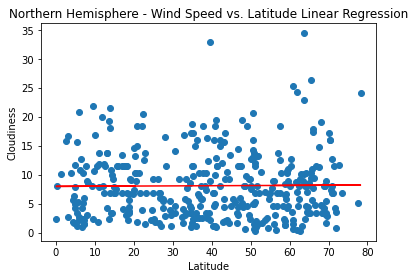

In [74]:
# Calculate the correlation coefficient and linear regression model 
# for Wind Speed and Latitude for the Northern Hemisphere

correlation = st.pearsonr(northern_df['Latitude'],northern_df['Wind Speed'])
print(f'The r-value is:{round(correlation[0],2)}.')

# Calculate the linear regression model for these two variables
x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data on the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Annotate the regression line
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.savefig('output_data/NLat_vs_WindSpeed_Reg.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is:-0.16.


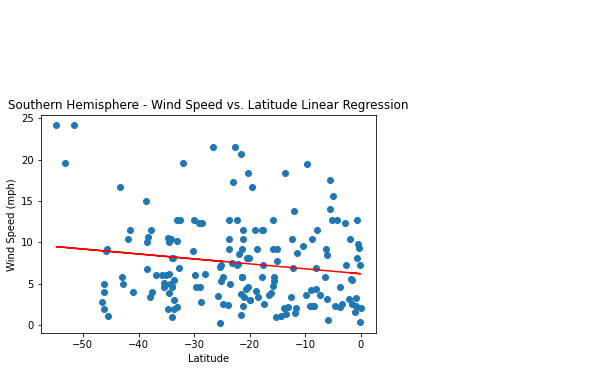

In [76]:
# Calculate the correlation coefficient and linear regression model 
# for Wind Speed and Latitude for the Northern Hemisphere

correlation = st.pearsonr(southern_df['Latitude'],southern_df['Wind Speed'])
print(f'The r-value is:{round(correlation[0],2)}.')

# Calculate the linear regression model for these two variables
x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data on the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Annotate the regression line
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.savefig('output_data/SLat_vs_WindSpeed_Reg.png')
plt.show()